Project Title: Cats vs. Dogs - Custom CNN vs Transfer Learning

Objective

This project compares two approaches for binary image classification:
	1.	A custom Convolutional Neural Network (CNN) built from scratch
	2.	A Transfer Learning model using MobileNetV2 pre-trained on ImageNet.


In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving S37 - dataset.zip to S37 - dataset.zip


In [ ]:
!unzip -q "S37 - dataset.zip"

I manually constructed a CNN with 4 convolutional layers and 4 fully connected layers to experiment with building a complete image classifier from scratch. Techniques like data augmentation, batch normalization, dropout, and max pooling were added to reduce overfitting and stabilize learning.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, RandomShear, RandomZoom, RandomFlip, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.utils import image_dataset_from_directory
training_datagen = image_dataset_from_directory('dataset/training_set', labels='inferred', label_mode = "binary", batch_size=32, image_size=(64,64), shuffle=True,validation_split=0.2, subset="training", seed = 123)
test_datagen = image_dataset_from_directory('dataset/test_set', labels='inferred', label_mode = "binary", batch_size=32, image_size=(64,64), shuffle=True,validation_split=0.2, subset="validation", seed = 123)



model = Sequential()

model.add(Rescaling(scale=1./255,input_shape=(64, 64, 3)))
model.add(RandomShear(x_factor=0.1, y_factor=0.1, interpolation="nearest", fill_mode="wrap"))
model.add(RandomZoom(height_factor=(0.1), width_factor=None, fill_mode="nearest", interpolation="nearest"))
model.add(RandomFlip(mode="horizontal_and_vertical", seed=10))


model.add(Conv2D(filters=256 ,kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2, strides=2))


model.add(Conv2D(filters=128 ,kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2, strides=2))


model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=2, strides=2))


model.add(Flatten())

model.add(Dense(units=256 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=128 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=64 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=32 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=1 , activation='sigmoid'))

ES = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

model.compile(optimizer= 'Adam', loss='binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC()])

model.summary()


Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_shear (RandomShear)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 474,593 (1.81 MB)

 Trainable params: 472,673 (1.80 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
history = model.fit(x = training_datagen , validation_data = test_datagen, epochs = 100, callbacks =[ES])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.5731 - auc: 0.6199 - loss: 0.6800 - val_accuracy: 0.6000 - val_auc: 0.6392 - val_loss: 0.6757
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6143 - auc: 0.6591 - loss: 0.6591 - val_accuracy: 0.5675 - val_auc: 0.5997 - val_loss: 0.7446
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.6310 - auc: 0.6604 - loss: 0.6553 - val_accuracy: 0.5275 - val_auc: 0.6685 - val_loss: 0.7934
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.6424 - auc: 0.6979 - loss: 0.6308 - val_accuracy: 0.5350 - val_auc: 0.6252 - val_loss: 0.8443
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.6539 - auc: 0.7071 - loss: 0.6250 - val_accuracy: 0.5350 - val_auc: 0.6733 - val_loss: 0.7447
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.6725 - auc: 0.7378 - loss: 0.6016 - val_accuracy: 0.5150 - val_auc: 0.6727 - val_loss: 0.8972


In [ ]:
import numpy as np
y_true = np.concatenate([y for x, y in test_datagen], axis=0)
y_pred_probs = model.predict(test_datagen)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


✅ Accuracy: 0.4850
[[143  61]
 [145  51]]


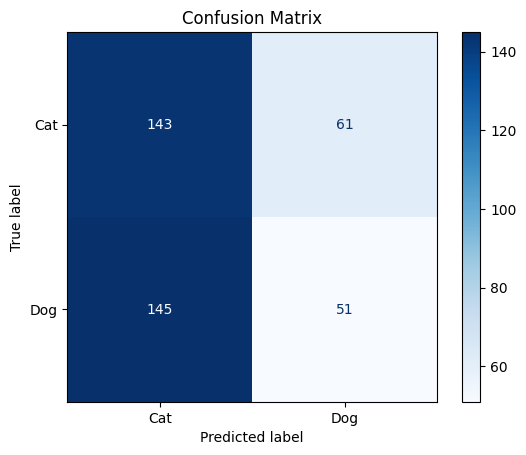

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

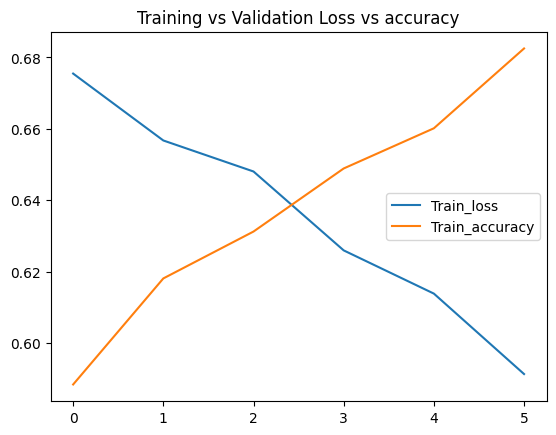

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

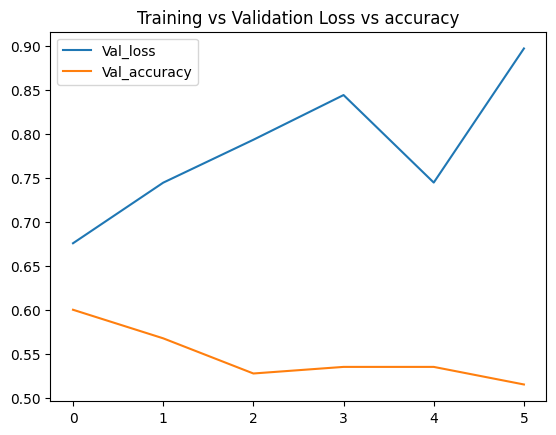

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label='Val_loss')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

**Transfer Learning with MobileNetV2 for Binary Image Classification (Cats vs. Dogs)**

In this section, I transitioned from a custom-built Convolutional Neural Network to a Transfer Learning approach using MobileNetV2, a powerful pre-trained model developed by Google. My goal was to demonstrate how transfer learning can drastically improve performance over basic CNNs on the same dataset, even with limited computational resources.

Objective
	•	Task: Classify images as either cats or dogs using 8000 training and 2000 test images.
	•	Challenge: My custom CNN model showed limited performance (~51% accuracy), indicating underfitting and/or insufficient data/features learned.
	•	Solution: Use MobileNetV2, a lightweight, general-purpose image classification model trained on ImageNet, and fine-tune it for my binary classification problem.


Used image_dataset_from_directory to load images from the structured dataset folder into TensorFlow-compatible datasets.

Applied prefetch(tf.data.AUTOTUNE) to asynchronously load data for better pipeline performance.

Images were resized to 160x160 to match MobileNetV2’s lower-resolution variant while saving compute power.


Loaded MobileNetV2 with pre-trained weights from ImageNet (weights='imagenet') and include_top=True, which retains the original top classifier. However, in many scenarios, include_top=False is preferred for better customization. Here, I retained it to evaluate its behavior with direct sigmoid output for binary classification.

Set trainable=False to freeze all layers, preventing weight updates during training, which speeds up training and prevents overfitting on small datasets.


Rescaling: Converts pixel values from [0,255] to [0,1].
Flatten: Converts the feature map from MobileNetV2 into a 1D vector.
Dense Layers: Added one dense layer with dropout to reduce overfitting and improve learning from MobileNet’s extracted features.
Output Layer: Single neuron with sigmoid activation to output binary class probabilities (cat = 0, dog = 1).

Used Adam optimizer with a reduced learning rate (1e-4) to allow gentle fine-tuning and avoid disrupting the pre-trained weights.

EarlyStopping: Monitored validation loss to prevent overfitting and retain best weights after training plateaued.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, RandomShear, RandomZoom, RandomFlip, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.utils import image_dataset_from_directory
training_datagen = image_dataset_from_directory("dataset/training_set", labels='inferred', label_mode = "binary", batch_size=32, image_size=(160,160), shuffle=False, seed = 123)
test_datagen = image_dataset_from_directory("dataset/test_set", labels='inferred', shuffle= False,  label_mode = "binary", batch_size=32, image_size=(160,160), seed = 123)
training_datagen = training_datagen.prefetch(buffer_size=tf.data.AUTOTUNE)
test_datagen = test_datagen.prefetch(buffer_size=tf.data.AUTOTUNE)

from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights = 'imagenet', input_shape=(160,160,3), include_top = True)
base_model.trainable = False

model = Sequential()
model.add(Rescaling(1./255, input_shape=(160, 160, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))

ES = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

model.compile(optimizer = Adam(learning_rate=1e-4), loss = 'binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

model.summary()


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 1000)           │     3,538,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,667,241 (13.99 MB)

 Trainable params: 128,257 (501.00 KB)

 Non-trainable params: 3,538,984 (13.50 MB)

In [ ]:
history2 = model.fit(x=training_datagen, validation_data= test_datagen, epochs = 20,batch_size=32,callbacks=[ES])

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 80ms/step - accuracy: 0.8439 - auc_1: 0.2077 - loss: 0.6659 - val_accuracy: 0.9265 - val_auc_1: 0.9801 - val_loss: 0.6583
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8793 - auc_1: 0.4493 - loss: 0.6339 - val_accuracy: 0.9165 - val_auc_1: 0.9884 - val_loss: 0.6021
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9003 - auc_1: 0.4841 - loss: 0.5886 - val_accuracy: 0.9255 - val_auc_1: 0.9895 - val_loss: 0.5303
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9097 - auc_1: 0.4913 - loss: 0.5268 - val_accuracy: 0.9320 - val_auc_1: 0.9901 - val_loss: 0.4557
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9226 - auc_1: 0.4938 - loss: 0.4568 - val_accuracy: 0.9395 - val_auc_1: 0.9903 - val_loss: 0.3870
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9264 - auc_1: 0.4949 - loss: 0.3912 - val_accuracy: 0.9460 - val_auc_1: 0.9904 - val_loss: 0.3287
Epoc

In [ ]:
import numpy as np
y_true = np.concatenate([y for x, y in test_datagen], axis=0)
y_pred_probs = model.predict(test_datagen)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step


✅ Accuracy: 0.9595
[[943  57]
 [ 24 976]]


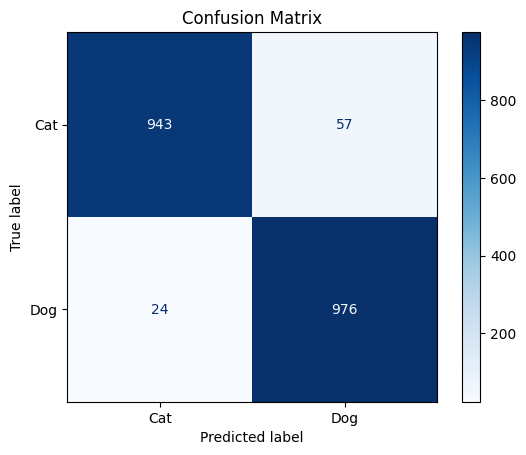

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

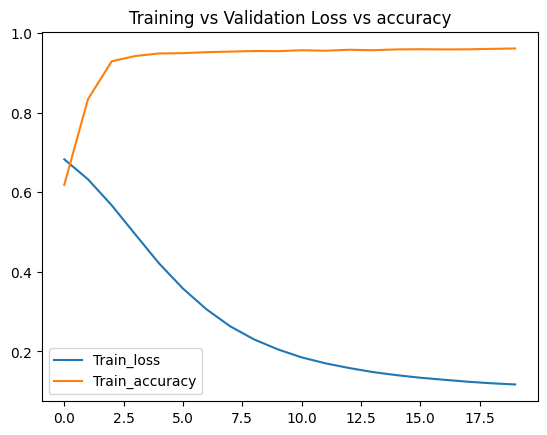

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Train_loss')
plt.plot(history2.history['accuracy'], label='Train_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()

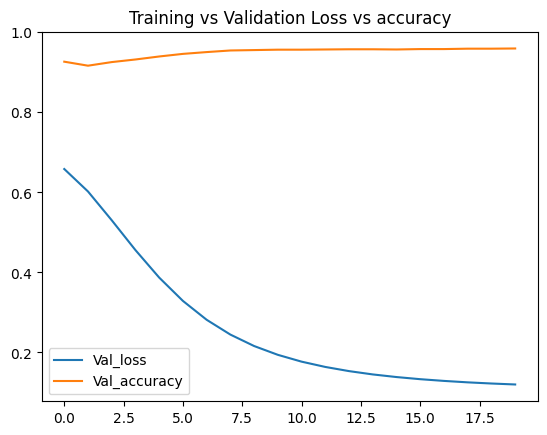

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['val_loss'], label='Val_loss')
plt.plot(history2.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.title("Training vs Validation Loss vs accuracy")
plt.show()